AttributeError: 'Axes' object has no attribute 'savefig'

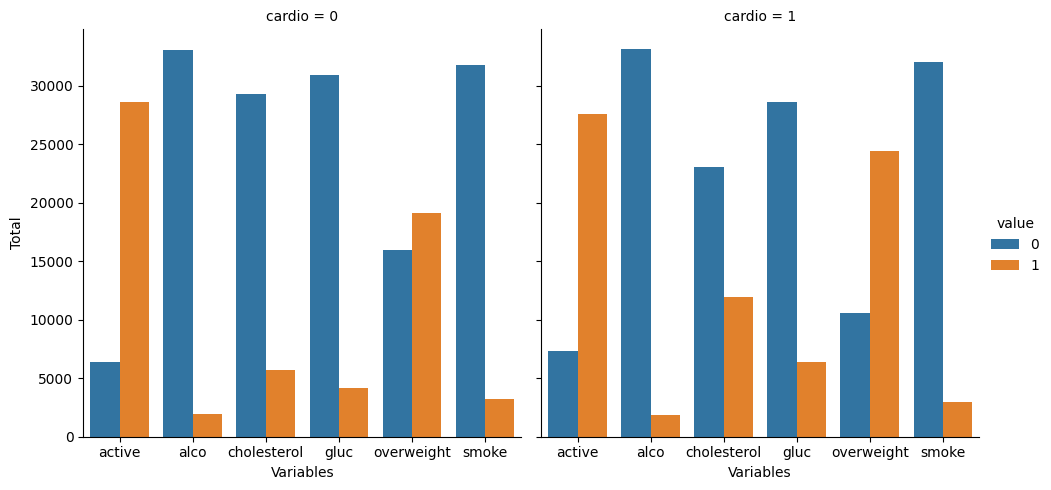

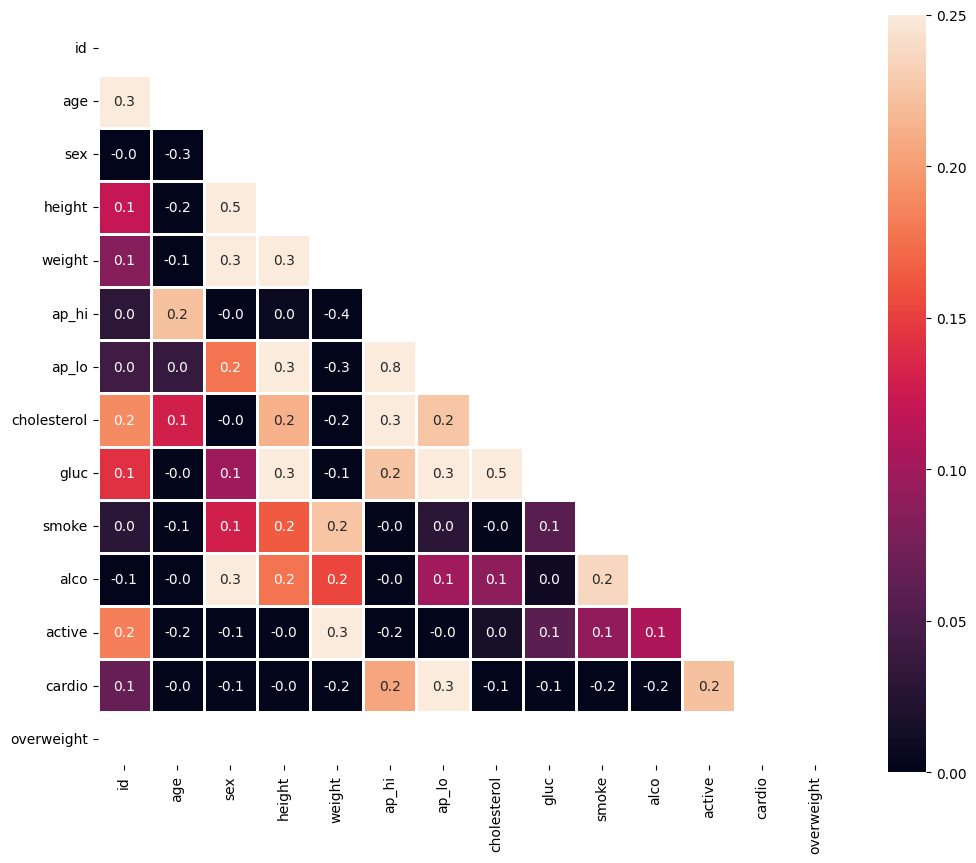

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(r"C:\Users\PC\OneDrive\Dokumente\tutorial pythonfiles\csv files\medical_examination.csv")

df['overweight'] =np.where((df["weight"]/np.square(df["height"]/100))>25,1,0)

df[["cholesterol","gluc"]] = np.where(df[["cholesterol","gluc"]]==1,0,1)

def draw_cat_plot():
    df_cat =pd.melt(df, id_vars=["cardio"], value_vars = ['active','alco','cholesterol','gluc','overweight','smoke'])
    figure = sns.catplot(x="variable",kind="count",hue="value",data=df_cat, col="cardio")
    figure.set_axis_labels("Variables","Total")
    fig=figure
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    df_heat = df[(df['ap_lo']<=df['ap_hi'])&
                  (df['height']>=df['height'].quantile(0.025))&
                  (df['height']<=df['height'].quantile(0.975))&
                  (df['weight']>=df['height'].quantile(0.025))&
                  (df['weight']<=df['height'].quantile(0.975))
                ]
   
    corr = df_heat.corr()

    fig, ax = plt.subplots(figsize=(12,12))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    figure = sns.heatmap(corr,vmin=0,vmax=0.25,fmt='.1f',
            linewidth=1, annot=True,mask=mask,square=True, cbar_kws={'shrink':.82})
    fig=figure
    fig.savefig('heatmap.png')
    return fig
draw_cat_plot()
draw_heat_map()